In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 6.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618276 sha256=0ebd31ae9ffada2f3a95fbf5f3c9a4d686822f3da003edbbe6b8632a7b67727e
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


Importing the libraries

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD,KNNBasic,BaselineOnly
from surprise.model_selection import train_test_split, cross_validate
import numpy as np
import pandas as pd
from tabulate import tabulate
import plotly.express as px

Reading the file

In [ ]:
#file=Dataset.load_builtin('./ratings.csv')
reader=Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
file=Dataset.load_from_file('./ratings.csv', reader=reader)
file

Splitting the data into train and test sets

In [ ]:
train_s, test_s= train_test_split(file,test_size=.15)


**User-based model**

CF with Cosine similarity

In [ ]:
KNN=KNNBasic(sim_options = {
    "name": "cosine",
    "user_based": True
}).fit(train_s)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Making Predictions with the model:

In [ ]:
preds=KNN.test(test_s)

Evaluating the model with RMSE, MAE:

In [ ]:
accuracy.rmse(preds)
accuracy.mae(preds)


RMSE: 0.9719
MAE:  0.7491


0.7491473181821142

CF with Pearson Correlation

In [ ]:
knn=KNNBasic(sim_options = {
    "name": "pearson_baseline",
    "shrinkage": 0,
    "user_based": True
}).fit(train_s)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Making predictions with the model:

In [ ]:
pred=KNN.test(test_s)

Evaluating the model with RMSE & MAE:

In [ ]:
accuracy.rmse(pred)
accuracy.mae(pred)

RMSE: 0.9719
MAE:  0.7491


0.7491473181821142

**Item-based model**

CF with Cosine Similarity

In [ ]:
KNN=KNNBasic(sim_options = {
    "name": "cosine",
    "user_based": False
}).fit(train_s)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Making Predictions with the model

In [ ]:
preds=KNN.test(test_s)

Evaluating the model with RMSE & MAE:

In [ ]:
accuracy.rmse(preds)
accuracy.mae(preds)


RMSE: 0.9816
MAE:  0.7655


0.765533968705085

CF with Pearson Correlation

In [ ]:
knn=KNNBasic(sim_options = {
    "name": "pearson_baseline",
    "shrinkage": 0,
    "user_based": False
}).fit(train_s)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Making predictions with the model:

In [ ]:
pred=KNN.test(test_s)

Evaluating the model with RMSE & MAE:

In [ ]:
accuracy.rmse(pred)
accuracy.mae(pred)

RMSE: 0.9816
MAE:  0.7655


0.765533968705085

BaselineOnly Model

In [ ]:
baseline=BaselineOnly(bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}).fit(train_s)

Estimating biases using als...


Making predictions with the model:

In [ ]:
predbase=baseline.test(test_s)

Evaluating the model with RMSE & MAE:

In [ ]:
accuracy.rmse(predbase)
accuracy.mae(predbase)

RMSE: 0.8705
MAE:  0.6705


0.6705264888911177

**Benchmarking**

In [ ]:
KNNbench=KNNBasic(sim_options = {
    "name": "cosine",
    "user_based": True
})

knnbench=KNNBasic(sim_options = {
    "name": "pearson_baseline",
    "shrinkage": 0,
    "user_based": True
})

Kbench=KNNBasic(sim_options = {
    "name": "cosine",
    "user_based": False
})

kbench=KNNBasic(sim_options = {
    "name": "pearson_baseline",
    "shrinkage": 0,
    "user_based": False
})

basebench=BaselineOnly(bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
})


In [ ]:
combine = {'CF with Cosine Similarity(User-Based)': KNNbench, 
            'CF with Pearson Similarity(User-Based)': knnbench, 
            'CF with Cosine Similarity(Item-Based)': Kbench, 
            'CF with Pearson Similarity(Item-Based)': kbench, 
            'BaselineOnly Model': basebench}

In [ ]:
table=[]
for entry in combine.keys():  
  print(entry)
  out = cross_validate(combine[entry], file, ['rmse', 'mae'], cv=5, verbose=True)
  rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
  mae = '{:.3f}'.format(np.mean(out['test_mae']))
  fittime = '{:.3f}'.format(np.mean(out['fit_time']))  
  line = [entry, rmse, mae, fittime]
  print(tabulate([line], tablefmt="pipe"))
  table.append(line) 

CF with Cosine Similarity(User-Based)
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9786  0.9741  0.9648  0.9688  0.9699  0.9712  0.0047  
MAE (testset)     0.7522  0.7484  0.7445  0.7470  0.7491  0.7482  0.0025  
Fit time          0.37    0.36    0.36    0.35    0.35    0.36    0.01    
Test time         1.71    1.57    1.56    1.67    1.54    1.61    0.07    
|:--------------------------------------|------:|------:|------:|
| CF with Cosine Similarity(User-Based) | 0.971 | 0.748 | 0.361 |
CF with Pearson 

In [ ]:
heading=['MODEL','RMSE','MAE','FIT-TIME']
df=pd.DataFrame(table)
df.columns=heading
df

,MODEL,RMSE,MAE,FIT-TIME
0,CF with Cosine Similarity(User-Based),0.971,0.748,0.361
1,CF with Pearson Similarity(User-Based),0.982,0.755,0.633
2,CF with Cosine Similarity(Item-Based),0.977,0.762,16.304
3,CF with Pearson Similarity(Item-Based),0.942,0.727,10.156
4,BaselineOnly Model,0.867,0.667,0.184


**Visualizing with the help of Bar Chart**

Graph for RMSE:

In [ ]:
fig = px.bar(df, x='MODEL', y='RMSE', color='RMSE', title="RMSE Graph")
fig.show()

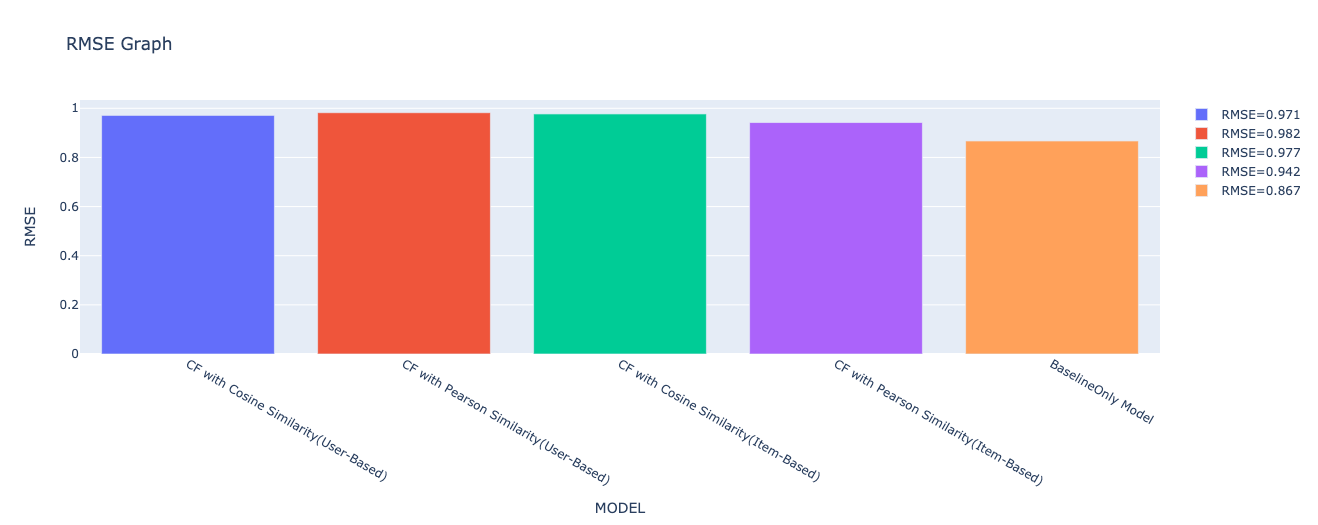

Graph for MAE:

In [ ]:
fig = px.bar(df, x='MODEL', y='MAE', color='MAE', title="MAE Graph")
fig.show()

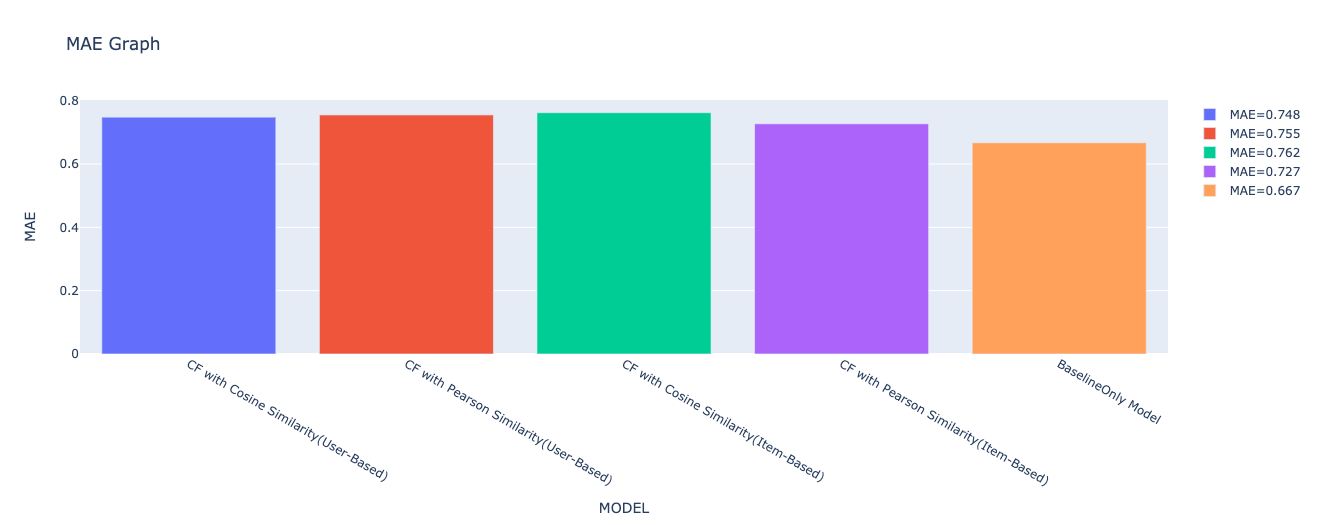

Grapg for Fit-Time:

In [ ]:
fig = px.bar(df, x='MODEL', y='FIT-TIME', color='FIT-TIME', title="Fit-Time Graph")
fig.show()

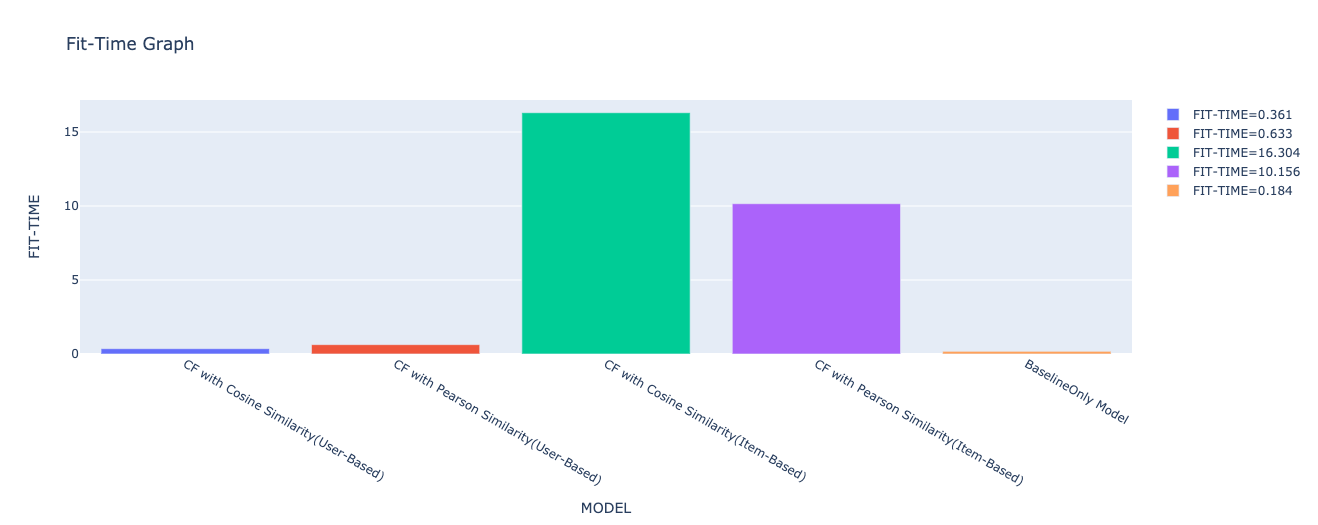